In [169]:
# import packages 
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import ast
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [170]:
# set directory 
main_directory = os.getcwd().strip('notebooks')

# set file name of raw data
raw_file = 'raw_data_domain-09-03.xlsx'

## Clean raw data

In [171]:
# read in raw data
raw_data = pd.read_excel(main_directory +'data/raw/' + raw_file)

In [172]:
# view data frame
raw_data

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
0,https://www.domain.com.au/26-the-glades-taylor...,26 The Glades Taylors Hill VIC 3037,400,"<span class=""css-in3yi3"">House</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.712841, 144.764943]","[['3 Beds'], ['2 Baths'], ['2 Parking'], []]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>*DID YOU KNOW YOU CAN BOOK AN INSPECTION O...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
1,https://www.domain.com.au/150-vearings-road-wo...,150 Vearings Road Wollert VIC 3750,$400 per week,"<span class=""css-in3yi3"">Townhouse</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.5958561, 144.991903]","[['3 Beds'], ['2 Baths'], ['2 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>Enjoy a lifestyle unrivalled in stylish lu...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
2,https://www.domain.com.au/59a-whyte-street-col...,59A Whyte Street Coleraine VIC 3315,$300 p/w,"<span class=""css-in3yi3"">Townhouse</span>","<ul class=""css-pw7xmy"" data-testid=""listing-su...","[-37.5987575, 141.6939533]","[['2 Beds'], ['1 Bath'], ['2 Parking'], []]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>Take advantage of terrace views over Coler...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
3,https://www.domain.com.au/4-anwyl-cl-mildura-v...,4 Anwyl Cl Mildura VIC 3500,$400 weekly,"<span class=""css-in3yi3"">House</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-34.194151, 142.1335366]","[['3 Beds'], ['2 Baths'], ['2 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...","[<p>Ideally situated in a quiet street, this t...","[<tr class=""css-1a43shy"" data-testid=""neighbou..."
4,https://www.domain.com.au/2-12-lawson-street-b...,2/12 Lawson Street Balwyn North VIC 3104,590,"<span class=""css-in3yi3"">House</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.800306, 145.068128]","[['3 Beds'], ['3 Baths'], ['2 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>A beautiful north-facing bay window soaks ...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
...,...,...,...,...,...,...,...,...,...,...
11588,https://www.domain.com.au/19-glyndon-rd-camber...,19 Glyndon Rd Camberwell VIC 3124,$600 weekly,"<span class=""css-in3yi3"">Apartment / Unit / Fl...","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.8363392, 145.0786926]","[['2 Beds'], ['2 Baths'], ['2 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>Lovingly cared for and located on a corner...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
11589,https://www.domain.com.au/23-4-mason-street-ne...,23/4 Mason Street Newport VIC 3015,460,"<span class=""css-in3yi3"">Apartment / Unit / Fl...","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.8422078, 144.8821432]","[['2 Beds'], ['1 Bath'], ['1 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>Near new designer penthouse style apartmen...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
11590,https://www.domain.com.au/1-23a-mantell-street...,1/23A Mantell Street Moonee Ponds VIC 3039,$610pw/$2651pcm,"<span class=""css-in3yi3"">Townhouse</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.7639674, 144.9154754]","[['2 Beds'], ['1 Bath'], ['1 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>Key Features:<br/>- Brand new two-bedroom ...,"[<tr class=""css-1a43shy"" data-testid=""neighbou..."
11591,https://www.domain.com.au/74-queen-circuit-sun...,74 Queen Circuit Sunshine VIC 3020,$440 Per Week,"<span class=""css-in3yi3"">Townhouse</span>","<ul class=""css-1h9anz9"" data-testid=""listing-s...","[-37.7970088, 144.8284279]","[['2 Beds'], ['2 Baths'], ['1 Parking']]","[<h4 class=""css-juce83"" data-testid=""listing-d...",[<p>It's easy to see why this estate is called...,"[<tr cla

In [173]:
# get rid of the html text in the columns
columns = ['extra', 'property_type', 'desc_title','desc', 'neighbourhood_insights']
for column in columns: 
    raw_data[column] = raw_data[column].str.replace("<.*?>", "")


/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/1615010414.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_data[column] = raw_data[column].str.replace("<.*?>", "")


In [174]:
# examine if there are duplicates in terms of individual entered types -> none were found
print(set(raw_data['property_type']))

{'Duplex', 'Farm', 'Townhouse', 'Penthouse', 'Terrace', 'Rural', 'Acreage / Semi-Rural', 'Apartment / Unit / Flat', 'Semi-Detached', 'Villa', 'House', 'Vacant land', 'New Apartments / Off the Plan', 'Retirement', 'Studio', 'Carspace'}


In [175]:
raw_data

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
0,https://www.domain.com.au/26-the-glades-taylor...,26 The Glades Taylors Hill VIC 3037,400,House,Date Available: Available NowBond $1733Land ar...,"[-37.712841, 144.764943]","[['3 Beds'], ['2 Baths'], ['2 Parking'], []]",[Convenient Town House Lifestyle],[*DID YOU KNOW YOU CAN BOOK AN INSPECTION ONLI...,"[under 2037%, 20 - 3928%, 40 - 5928%, 60+7%]"
1,https://www.domain.com.au/150-vearings-road-wo...,150 Vearings Road Wollert VIC 3750,$400 per week,Townhouse,Date Available: Available NowBond $1738,"[-37.5958561, 144.991903]","[['3 Beds'], ['2 Baths'], ['2 Parking']]",[STYLISH MODERN LIVING],[Enjoy a lifestyle unrivalled in stylish luxur...,"[under 2023%, 20 - 3929%, 40 - 5925%, 60+24%]"
2,https://www.domain.com.au/59a-whyte-street-col...,59A Whyte Street Coleraine VIC 3315,$300 p/w,Townhouse,Date Available: Available NowBond $1200Land ar...,"[-37.5987575, 141.6939533]","[['2 Beds'], ['1 Bath'], ['2 Parking'], []]",[Terrace Living - Coleraine CBD],[Take advantage of terrace views over Colerain...,"[under 2019%, 20 - 3917%, 40 - 5927%, 60+38%]"
3,https://www.domain.com.au/4-anwyl-cl-mildura-v...,4 Anwyl Cl Mildura VIC 3500,$400 weekly,House,"Available from Friday, 16th September 2022Bond...","[-34.194151, 142.1335366]","[['3 Beds'], ['2 Baths'], ['2 Parking']]",[Modern Living],"[Ideally situated in a quiet street, this thre...","[under 2017%, 20 - 3917%, 40 - 5917%, 60+50%]"
4,https://www.domain.com.au/2-12-lawson-street-b...,2/12 Lawson Street Balwyn North VIC 3104,590,House,"Available from Friday, 30th September 2022Bond...","[-37.800306, 145.068128]","[['3 Beds'], ['3 Baths'], ['2 Parking']]",[WHAT A DELIGHT],[A beautiful north-facing bay window soaks up ...,"[under 2022%, 20 - 3928%, 40 - 5922%, 60+28%]"
...,...,...,...,...,...,...,...,...,...,...
11588,https://www.domain.com.au/19-glyndon-rd-camber...,19 Glyndon Rd Camberwell VIC 3124,$600 weekly,Apartment / Unit / Flat,Date Available: Available NowBond $2607,"[-37.8363392, 145.0786926]","[['2 Beds'], ['2 Baths'], ['2 Parking']]",[OLD WORLD STYLE &amp; CHARM],[Lovingly cared for and located on a corner bl...,"[under 2023%, 20 - 3926%, 40 - 5924%, 60+28%]"
11589,https://www.domain.com.au/23-4-mason-street-ne...,23/4 Mason Street Newport VIC 3015,460,Apartment / Unit / Flat,Date Available: Available NowBond $1999,"[-37.8422078, 144.8821432]","[['2 Beds'], ['1 Bath'], ['1 Parking']]",[*PLEASE REGISTER YOUR INTEREST TO BE ALERTED ...,[Near new designer penthouse style apartment w...,"[under 2021%, 20 - 3924%, 40 - 5925%, 60+30%]"
11590,https://www.domain.com.au/1-23a-mantell-street...,1/23A Mantell Street Moonee Ponds VIC 3039,$610pw/$2651pcm,Townhouse,Date Available: Available NowBond $2651,"[-37.7639674, 144.9154754]","[['2 Beds'], ['1 Bath'], ['1 Parking']]","[Luxe townhouse, prime location]",[Key Features:- Brand new two-bedroom townhous...,"[under 2019%, 20 - 3922%, 40 - 5923%, 60+36%]"
11591,https://www.domain.com.au/74-queen-circuit-sun...,74 Queen Circuit Sunshine VIC 3020,$440 Per Week,Townhouse,"Available from Tuesday, 20th September 2022","[-37.7970088, 144.8284279]","[['2 Beds'], ['2 Baths'], ['1 Parking']]",[Two Bedroom Home at the Royal!],[It's easy to see why this estate is called th...,"[under 2025%, 20 - 3929%, 40 - 5929%, 60+18%]"


In [176]:
# view the cost_text types -> inconsistent formatting it seems
raw_data.groupby('cost_text')['cost_text'].count()

cost_text
34.52                              1
40                                 1
50                                 1
60                                 3
66                                 1
                                  ..
from $320 per night off peak       1
from $580 per week                 1
from $830 pw - 1 Month min Stay    1
furnished $550/week                1
under application                  1
Name: cost_text, Length: 2348, dtype: int64

## parse Numerical data

In [177]:
# filter out all the cost text that is completely numerical 
numerical_data = raw_data[pd.to_numeric(raw_data['cost_text'], errors='coerce').notnull()]

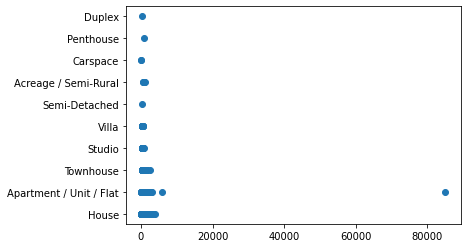

In [178]:
# make a plot to examine the data values in the numerical data
plt.scatter(numerical_data['cost_text'],numerical_data['property_type']) # seems like there are some disrepancies; some unusual values

In [179]:
# firstly, remove the ridiculously large data point
numerical_data = numerical_data[numerical_data['cost_text'].astype(int) <20000]

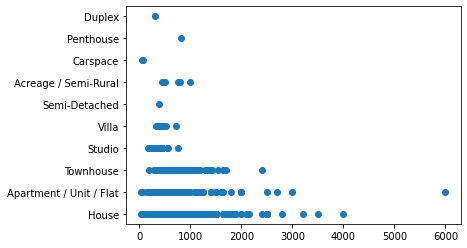

In [180]:
# now examine the scatter plot again
plt.scatter(numerical_data['cost_text'],numerical_data['property_type']) # still many large values in the dataset

In [181]:
# new data frame with cost data not to be touched removed
raw_data2 = raw_data[~raw_data.cost_text.isin(numerical_data.cost_text)]

In [182]:
# convert all cost data to lower case
raw_data2['cost_text'] =raw_data2['cost_text'].str.lower()
raw_data2['cost_text'] =raw_data2['cost_text'].str.strip('.')

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/2918010484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2['cost_text'] =raw_data2['cost_text'].str.lower()
/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/2918010484.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data2['cost_text'] =raw_data2['cost_text'].str.strip('.')


## parse weekly data

In [183]:
# get all data with week or p/w
week_data = raw_data2[(raw_data2['cost_text'].str.contains("week"))|(raw_data2['cost_text'].str.contains("p/w"))|(raw_data2['cost_text'].str.contains("pw"))]

In [184]:
# rest of data frame is anything apart from week data above -> segregate this
raw_data3 =  raw_data2[~((raw_data2['cost_text'].str.contains("week"))|(raw_data2['cost_text'].str.contains("p/w"))|(raw_data2['cost_text'].str.contains("pw")))]

In [185]:
# further segregate week data into the data that contains $ or $ -> doesn't seem to work
week_data_money = week_data[week_data['cost_text'].str.contains('$')]
week_data_no_money =  week_data[week_data['cost_text'].str.contains('$') == False]

In [186]:
# extract the value after $ -> this is the weekly rent price
week_data['cost_text'] =week_data['cost_text'].str.extract('\$([0-9,.]+)')

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/2294681146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['cost_text'] =week_data['cost_text'].str.extract('\$([0-9,.]+)')


In [187]:
# remove any commas
week_data['cost_text']=week_data['cost_text'].str.replace(',', '')

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/315761293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['cost_text']=week_data['cost_text'].str.replace(',', '')


In [188]:
# convert everything to float
week_data['cost_text'] = week_data['cost_text'].astype(float)

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/165954624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_data['cost_text'] = week_data['cost_text'].astype(float)


In [189]:
# drop na values
raw_data3.dropna(inplace = True)

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/1171169698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data3.dropna(inplace = True)


## parse monthly data -> convert to weekly

In [190]:
# segregate all the monthly data
month_data = raw_data3[raw_data3['cost_text'].str.contains('month')]
# segregate none-month data
raw_data4 = raw_data3[~(raw_data3['cost_text'].str.contains('month'))]

In [191]:
month_data

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
105,https://www.domain.com.au/50-mason-street-newp...,50 Mason Street Newport VIC 3015,"$3,000 per month, plus gst & outgoings",House,Date Available: Available NowBond $3000,"[-37.841798, 144.8788595]","[['4 Beds'], ['2 Baths'], ['4 Parking']]",[IDEAL MEDICAL ROOMS - MAXIMUM EXPOSURE - IN T...,[Previously operated as a medical centre but s...,"[under 2028%, 20 - 3933%, 40 - 5923%, 60+15%]"
147,https://www.domain.com.au/614-5-olive-york-way...,614/5 Olive York Way Brunswick West VIC 3055,1912.00 per month,Apartment / Unit / Flat,"Available from Friday, 30th September 2022Bond...","[-37.7587375, 144.9390345]","[['2 Beds'], ['2 Baths'], ['1 Parking']]","[MODERN TWO BEDROOM, TWO BATHROOM APARTMENT]",[The Grove presents a contemporary and truly o...,"[under 2012%, 20 - 3953%, 40 - 5921%, 60+13%]"
761,https://www.domain.com.au/5-135-anstruther-str...,5/135 Anstruther Street Echuca VIC 3564,$1474 calendar month,Apartment / Unit / Flat,"Available from Thursday, 15th September 2022Bo...","[-36.1258803, 144.7558286]","[['2 Beds'], ['1 Bath'], ['1 Parking']]",[So Central &amp; Fully Furnished],[This fully furnished unit is located less tha...,"[under 2018%, 20 - 3923%, 40 - 5924%, 60+34%]"
794,https://www.domain.com.au/464a-main-road-west-...,464A Main Road West St Albans VIC 3021,$2000 per month,House,Date Available: Available NowBond $2000Land ar...,"[-37.7422195, 144.7845306]","[['3 Beds'], ['1 Bath'], ['2 Parking'], []]",[Uniquely Modern but Vintage],"[ListedAS - Uniquely Modern but Vintage, Featu...","[under 2024%, 20 - 3937%, 40 - 5922%, 60+17%]"
963,https://www.domain.com.au/41-magnolia-drive-ec...,41 Magnolia Drive Echuca VIC 3564,$2384 calendar month,House,"Available from Friday, 14th October 2022Bond $...","[-36.1373504, 144.721378]","[['4 Beds'], ['2 Baths'], ['6 Parking']]",[Ultimate Family Living],[This spacious home is set on a large block an...,"[under 2020%, 20 - 3919%, 40 - 5917%, 60+44%]"
1310,https://www.domain.com.au/3-101-ebony-drive-pa...,3/101 Ebony Drive Pakenham VIC 3810,$1473 per calendar month,Apartment / Unit / Flat,"Available from Saturday, 17th September 2022Bo...","[-38.0644518, 145.5042976]","[['2 Beds'], ['1 Bath'], ['1 Parking']]",[CLOSE TO SHOPS],[Neat and tidy 2 Bedroom Unit situated close t...,"[under 2032%, 20 - 3935%, 40 - 5922%, 60+11%]"
1335,https://www.domain.com.au/113-63-william-stree...,113/63 William Street Abbotsford VIC 3067,"$2,200 per month",Apartment / Unit / Flat,Date Available: Available NowBond $2200,"[-37.8078616, 144.9974834]","[['2 Beds'], ['1 Bath'], ['1 Parking']]","[Two Bedroom, One Bathroom + Powder Room]",[Abbot is a stunning new development designed ...,"[under 2011%, 20 - 3950%, 40 - 5928%, 60+12%]"
2607,https://www.domain.com.au/11-howell-drive-echu...,11 Howell Drive Echuca VIC 3564,$2557 calendar month,House,"Available from Friday, 7th October 2022Bond $2360","[-36.1468508, 144.7222077]","[['4 Beds'], ['2 Baths'], ['2 Parking']]",[Family Home with a Big Shed!],"[This modern home comprises of 4 bedrooms, 2 b...","[under 2027%, 20 - 3922%, 40 - 5926%, 60+25%]"
3242,https://www.domain.com.au/62-william-street-st...,62 william street St Albans VIC 3021,"$2,500/month",House,Date Available: Available NowBond $2500,"[-37.737358, 144.815952]","[['2 Beds'], ['1 Bath'], []]",[SPACIOUS HOUSE FOR FAMILY BUSINESS],[ListedAS - SPACIOUS HOUSE FOR FAMILY BUSINESS...,"[under 2025%, 20 - 3932%, 40 - 5926%, 60+16%]"
3250,https://www.domain.com.au/marina-berth-martha-...,Marina Berth Martha Cove Waterway Safety Beach...,from $1000 per month,House,Date Available: Available Now,"[-38.3180829, 144.9880165]","[['1 Bed'], ['1 Bath'], []]",[Marina Berths in Martha Cove],"[In a secure inland harbour at Martha Cove, wi...","[under 2024%, 20 - 3919%, 40 - 5923%, 60+34%]"


In [192]:
# extract the value after $ -> this is the monthly rent price
month_data['cost_text'] =month_data['cost_text'].str.extract('\$([0-9,.]+)')
# remove any commas
month_data['cost_text']=month_data['cost_text'].str.replace(',', '')

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/2152846383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['cost_text'] =month_data['cost_text'].str.extract('\$([0-9,.]+)')
/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/2152846383.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['cost_text']=month_data['cost_text'].str.replace(',', '')


In [193]:
# drop any na values
month_data = month_data.dropna()

In [194]:
# convert month data to week data by x 12 and /52
month_data['cost_text'] = month_data['cost_text'].astype(float)*12/52

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/3178773009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_data['cost_text'] = month_data['cost_text'].astype(float)*12/52


## parse number/string mixed data

In [195]:
# segregate all rows that contain numbers
contains_numbers = raw_data4[raw_data4.cost_text.str.contains('.*[0-9].*', regex=True)]
# again split the dataframe
raw_data5 = raw_data4[~(raw_data4.cost_text.str.contains('.*[0-9].*', regex=True))]

In [196]:
# segregate anything that may have w in it -> per week
contains_numbers_week = contains_numbers[(contains_numbers.cost_text.str.contains('wk')|(contains_numbers.cost_text.str.contains('p.w'))|(contains_numbers.cost_text.str.contains('pw')))]

# get the non-week numbers data
contains_numbers_non_week = contains_numbers[~((contains_numbers.cost_text.str.contains('wk')|(contains_numbers.cost_text.str.contains('p.w'))|(contains_numbers.cost_text.str.contains('pw'))))]


In [197]:
# look at the contains_number non_week data -> doesn't seem to have useful information-> exclude this as it may add noise
contains_numbers_non_week

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
56,https://www.domain.com.au/38-buffalo-creek-roa...,38 Buffalo Creek Road Myrtleford VIC 3737,from $800 per night,Villa,Bond $500,"[-36.5781606, 146.7068584]","[['5 Beds'], ['2 Baths'], ['4 Parking']]",['TATOONIE'],[TATOONIE is a 6-star property set in the tran...,"[under 2019%, 20 - 3911%, 40 - 5936%, 60+35%]"
183,https://www.domain.com.au/66-hargreaves-street...,66 Hargreaves Street Bendigo VIC 3550,$670 - fully furnished,House,"Available from Thursday, 31st August 2023Bond ...","[-36.7532444, 144.2891422]","[['3 Beds'], ['1 Bath'], ['1 Parking']]",[FULLY FURNISHED - CONTACT AGENT FOR AVAILABIL...,[Stunningly renovated in a prime location clos...,"[under 2026%, 20 - 3926%, 40 - 5929%, 60+19%]"
195,https://www.domain.com.au/4-4a-south-street-ha...,4/4a South Street Hadfield VIC 3046,$260 to $280,Apartment / Unit / Flat,Date Available: Available NowBond $1127,"[-37.7154003, 144.9513918]","[['1 Bed'], ['1 Bath'], ['1 Parking']]",[Central Location and ready to call home!],[A renovated spacious one bedroom first level ...,"[under 2023%, 20 - 3920%, 40 - 5927%, 60+30%]"
335,https://www.domain.com.au/strathfieldsaye-bend...,Strathfieldsaye Bendigo VIC 3550,rent2own,House,Bond $1800Land area 582m²Internal area 205m²,"[-36.7570157, 144.2793906]","[['4 Beds'], ['2 Baths'], ['2 Parking'], []]",[Rent2own Homes $25K Building Grant end 31.12.20],"[Why choose Rent to Own, How does this work?, ...","[under 2017%, 20 - 3931%, 40 - 5926%, 60+26%]"
388,https://www.domain.com.au/2-holt-street-bendig...,2 Holt Street Bendigo VIC 3550,$670 - fully furnished,House,"Available from Saturday, 30th September 2023Bo...","[-36.75437900000001, 144.2871485]","[['3 Beds'], ['2 Baths'], ['1 Parking']]",[FULLY FURNISHED - CONTACT AGENT FOR AVAILABIL...,[Fully renovated throughout. Location close to...,"[under 2017%, 20 - 3931%, 40 - 5926%, 60+26%]"
...,...,...,...,...,...,...,...,...,...,...
11286,https://www.domain.com.au/1-46-koonawarra-stre...,1/46 Koonawarra Street Clayton VIC 3168,$310 water & electricity included,Studio,Date Available: Available Now,"[-37.9104919, 145.1250605]","[['1 Bed'], ['1 Bath'], []]",[Studio Apartment Only minutes from Monash Uni...,[Excellent Location !! More studios are availa...,"[under 208%, 20 - 3973%, 40 - 598%, 60+11%]"
11328,https://www.domain.com.au/2-31-booth-street-go...,2/31 Booth Street Golden Square VIC 3555,$640 - fully furnished,House,"Available from Sunday, 8th January 2023Bond $2781","[-36.7671327, 144.259216]","[['3 Beds'], ['2 Baths'], ['2 Parking']]",[FULLY FURNISHED - CONTACT AGENT FOR AVAILABIL...,[Three bedroom townhouse located just minutes ...,"[under 2021%, 20 - 3931%, 40 - 5927%, 60+21%]"
11356,https://www.domain.com.au/36-arnold-street-ben...,36 Arnold Street Bendigo VIC 3550,$650 - fully furnished,House,"Available from Monday, 12th September 2022Bond...","[-36.7524813, 144.2870098]","[['3 Beds'], ['2 Baths'], ['1 Parking']]",[FULLY FURNISHED - AVAILABLE MID SEPTEMBER],[FULLY FURNISHED. This beautifully renovated p...,"[under 2026%, 20 - 3926%, 40 - 5929%, 60+19%]"
11423,https://www.domain.com.au/1-60-the-avenue-prah...,1/60 The Avenue Prahran VIC 3181,$170 to $240,Apartment / Unit / Flat,Date Available: Available NowBond $340,"[-37.853143, 144.99859]","[['1 Bed'], ['1 Bath'], []]",[Rooming House Melbourne Prahran Windsor South...,[ALL ENQUIRIES STRICTLY BY EMAIL ONLY (no exce...,"[under 2017%, 20 - 3949%, 40 - 5920%, 60+14%]"


In [198]:
# extract the value after $ -> this is the monthly rent price
contains_numbers_week['cost_text'] =contains_numbers_week['cost_text'].str.extract('\$([0-9,.]+)')
# remove any commas
contains_numbers_week['cost_text']=contains_numbers_week['cost_text'].str.replace(',', '')

/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/498207624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contains_numbers_week['cost_text'] =contains_numbers_week['cost_text'].str.extract('\$([0-9,.]+)')
/var/folders/jv/q8z94ls52bq_4hrt0x88rlb40000gn/T/ipykernel_2965/498207624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contains_numbers_week['cost_text']=contains_numbers_week['cost_text'].str.replace(',', '')


In [199]:
# view the remaining dataframe-> doesn't seem to have anything usefule left
raw_data5

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
13,https://www.domain.com.au/2105-368-st-kilda-ro...,2105/368 St Kilda Road Melbourne VIC 3004,the deal: under offer,Apartment / Unit / Flat,Date Available: Available NowBond $10000Intern...,"[-37.8318086, 144.9710272]","[['3 Beds'], ['2 Baths'], ['2 Parking']]",[THE DEAL],[OBVIOUSUpon entering your attention is instan...,"[under 2010%, 20 - 3920%, 40 - 5923%, 60+47%]"
47,https://www.domain.com.au/ssc-37-caroville-dri...,SSC/37 Caroville Drive Warrnambool VIC 3280,enquire for availability,House,Date Available: Available Now,"[-38.3810726, 142.5179816]","[['1 Bed'], ['1 Bath'], []]",[Seniors Rental Community - Single Unit with K...,[This lovely ground-level single unit is part ...,"[under 2025%, 20 - 3922%, 40 - 5922%, 60+31%]"
53,https://www.domain.com.au/168-westcott-parade-...,168 Westcott Parade Rockbank VIC 3335,contact agent - call us to book an inspection,Acreage / Semi-Rural,Date Available: Available NowBond $6518,"[-37.728685, 144.654902]","[['5 Beds'], ['2 Baths'], ['4 Parking']]",[Ranch Style Home],[THE ELEET Caroline Springs proudly presents t...,"[under 2020%, 20 - 3925%, 40 - 5934%, 60+21%]"
119,https://www.domain.com.au/chelsea-vic-3196-117...,Chelsea VIC 3196,leased,Apartment / Unit / Flat,Date Available: Available Now,"[-38.051111, 145.121944]","[['2 Beds'], ['1 Bath'], ['1 Parking']]",[Leased],"[This well presented 2 bedroom unit, is situat...","[under 2019%, 20 - 3924%, 40 - 5925%, 60+32%]"
157,https://www.domain.com.au/208-sandy-road-st-an...,208 Sandy Road St Andrews Beach VIC 3941,contact agent,House,Date Available: Available NowBond $6083Land ar...,"[-38.4181171, 144.8526033]","[['4 Beds'], ['2 Baths'], ['8 Parking'], []]",[Fabulous Fingal Hideaway],"[Arriving at 208 Sandy Road, you will drive up...","[under 2024%, 20 - 3918%, 40 - 5928%, 60+31%]"
...,...,...,...,...,...,...,...,...,...,...
11321,https://www.domain.com.au/morwell-vic-3840-160...,Morwell VIC 3840,contact agent,Apartment / Unit / Flat,Date Available: Available Now,"[-38.2288029, 146.4112579]","[['2 Beds'], ['1 Bath'], []]",[BJ Bennett &amp; Co Real Estate Pty Ltd],"[**** For Lease****, This is a brick interior ...","[under 2024%, 20 - 3923%, 40 - 5928%, 60+25%]"
11401,https://www.domain.com.au/5-wattle-tree-lane-f...,5 Wattle Tree Lane Frankston VIC 3199,leased,House,Date Available: Available NowBond $1760,"[-38.1534676, 145.1567485]","[['3 Beds'], ['1 Bath'], ['2 Parking']]",[Central location with quick access to Peninsu...,[How to apply: Once you have attended one of t...,"[under 2025%, 20 - 3932%, 40 - 5923%, 60+20%]"
11491,https://www.domain.com.au/17-tarawill-street-r...,17 Tarawill Street Rye VIC 3941,under application,House,Date Available: Available NowBond $2607,"[-38.386315, 144.8109585]","[['4 Beds'], ['2 Baths'], ['2 Parking']]",[Leased],"[This home has been Leased , Easy walk to the...","[under 2022%, 20 - 3919%, 40 - 5926%, 60+34%]"
11526,https://www.domain.com.au/ballarat-central-vic...,Ballarat Central VIC 3350,why rent when you can buy. rent to own today,House,Date Available: Available NowBond $1800,"[-37.5610117, 143.8549159]","[['4 Beds'], ['2 Baths'], ['2 Parking']]",[Rent to Own Today! (Full Time Employment Requ...,"[No Deposit, No Worries! , Low Deposit Finance...","[under 2022%, 20 - 3927%, 40 - 5927%, 60+25%]"


## Join remaining data

In [200]:
# join remaining datasets
final_dataset = pd.concat([week_data, month_data,contains_numbers_week])

In [201]:
# drop any na values
final_dataset.dropna(inplace = True)

In [202]:
# convert final dataset into float
final_dataset['cost_text']=final_dataset['cost_text'].astype(float)

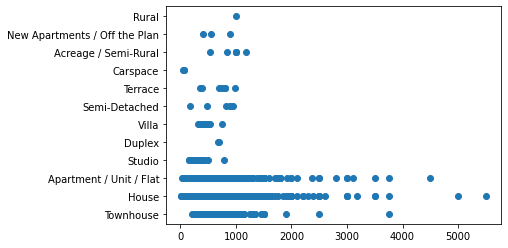

In [203]:
# scatter the dataset to see if there are any outliers 
plt.close()
plt.scatter(final_dataset['cost_text'],final_dataset['property_type'])

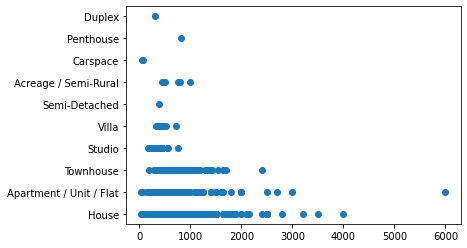

In [204]:
# compare this with the numerical data distribution
plt.scatter(numerical_data['cost_text'],numerical_data['property_type'])

In [205]:
# work out the meanof each type of houses before appending the numerical data
final_dataset.groupby('property_type')['cost_text'].mean()

property_type
Acreage / Semi-Rural              924.166667
Apartment / Unit / Flat           479.081193
Carspace                           56.666667
Duplex                            687.500000
House                             526.030308
New Apartments / Off the Plan     615.000000
Rural                            1000.000000
Semi-Detached                     700.000000
Studio                            255.989899
Terrace                           683.571429
Townhouse                         555.052769
Villa                             434.473684
Name: cost_text, dtype: float64

In [206]:
# work out the sd of  each type of houses before appending the numerical data
final_dataset.groupby('property_type')['cost_text'].std()

property_type
Acreage / Semi-Rural             218.367046
Apartment / Unit / Flat          258.344563
Carspace                           6.217618
Duplex                            17.677670
House                            292.238162
New Apartments / Off the Plan    257.245019
Rural                                   NaN
Semi-Detached                    309.467284
Studio                            80.442843
Terrace                          232.857508
Townhouse                        242.364214
Villa                             96.434992
Name: cost_text, dtype: float64

In [207]:
# it seems that the distribution of the two datasets are not too disimilar, we could probably merge them together safely
# final_dataset = pd.concat([final_dataset, numerical_data]) -> leave out numerical data for now

In [208]:
# examine max
final_dataset['cost_text'].astype(float).max()

5500.0

In [209]:
# examine min
final_dataset['cost_text'].astype(float).min()

18.0

In [210]:
# examine median
final_dataset['cost_text'].astype(float).median()

450.0

In [211]:
# examine sd
final_dataset['cost_text'].astype(float).std()

274.59302393101524

In [212]:
# examine mean
final_dataset['cost_text'].astype(float).mean()

506.2529952857307

## clean merged final dataset

In [213]:
final_dataset.sort_values(by = ['cost_text']) # check any irre, it seems that many of the 'houses' are storage units

,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights
3591,https://www.domain.com.au/5-greiner-court-tong...,5 Greiner Court Tongala VIC 3621,18.000000,House,Date Available: Available NowBond $150,"[-36.253557, 144.944557]",[],[Tongala Storage Units],[Storage Units available in convenient locatio...,"[under 2026%, 20 - 3927%, 40 - 5922%, 60+25%]"
3321,https://www.domain.com.au/5-9-greed-road-kyabr...,5-9 Greed Road Kyabram VIC 3620,18.923077,House,Date Available: Available NowBond $150,"[-36.3047596, 145.0348779]",[],[Storage Sheds],[Storage Sheds available in convenient central...,[]
8246,https://www.domain.com.au/14-jubilee-street-my...,14 Jubilee Street Myrtleford VIC 3737,21.923077,House,Date Available: Available NowBond $95,"[-36.554159, 146.7208003]",[],[Need More Room? Self storage Is The Answer!],[Whether you need personal storage for seasona...,"[under 2024%, 20 - 3920%, 40 - 5926%, 60+30%]"
7754,https://www.domain.com.au/47-chambers-street-m...,47 Chambers Street Myrtleford VIC 3737,25.384615,House,Date Available: Available NowBond $110,"[-36.5530096, 146.7188613]",[],[Need More Room? Self storage Is The Answer!],[Whether you need personal storage for seasona...,"[under 2024%, 20 - 3920%, 40 - 5926%, 60+30%]"
4177,https://www.domain.com.au/58-saleyards-road-be...,58 Saleyards Road Benalla VIC 3672,26.000000,House,Bond $100,"[-36.5380049, 145.9927626]",[],[NORTH EAST STORAGE - 58 SALEYARDS ROAD],[Benalla's newest self storage facilitySTAGE 3...,"[under 2022%, 20 - 3918%, 40 - 5932%, 60+28%]"
...,...,...,...,...,...,...,...,...,...,...
11381,https://www.domain.com.au/901-902-85-market-st...,901 & 902/85 Market Street South Melbourne VIC...,3750.000000,Apartment / Unit / Flat,Date Available: Available Now,"[-37.8301164, 144.9569041]","[['3 Beds'], ['3 Baths'], ['1 Parking']]",[CALL AMY ON 1800 941 000 - Exclusive Penthous...,[** PLEASE CONTACT AMY ON 1800 941 000 OR EMAI...,"[under 2010%, 20 - 3952%, 40 - 5928%, 60+10%]"
8360,https://www.domain.com.au/50-south-wharf-drive...,50 South Wharf Drive Docklands VIC 3008,3750.000000,Townhouse,Date Available: Available NowBond $16295,"[-37.8223967, 144.938237]","[['5 Beds'], ['6 Baths'], ['3 Parking']]","[Luxury, Style And Space]",[This spectacular five bedroom freehold waterf...,"[under 2020%, 20 - 3937%, 40 - 5932%, 60+11%]"
9692,https://www.domain.com.au/4203-35-spring-stree...,4203/35 Spring Street Melbourne VIC 3000,4500.000000,Apartment / Unit / Flat,Date Available: Available NowBond $27000,"[-37.8141725, 144.9740049]","[['3 Beds'], ['2 Baths'], ['4 Parking']]",[Arguably Melbourne's Most Captivating Penthouse],[Possibly the most prestigious CBD address in ...,"[under 2011%, 20 - 3932%, 40 - 5931%, 60+26%]"
8140,https://www.domain.com.au/9-lansdowne-street-b...,9 Lansdowne Street Blairgowrie VIC 3942,5000.000000,House,"Available from Friday, 23rd December 2022Bond ...","[-38.372703, 144.7856897]","[['3 Beds'], ['2 Baths'], ['3 Parking'], []]",[Beautiful beach house],"[Phone enquiry code for this property : 2751, ...","[under 2019%, 20 - 3914%, 40 - 5924%, 60+43%]"


In [214]:
# reset index
final_dataset.reset_index(inplace = True)

### get rooms atts

In [215]:

# take out beds, baths and parking
beds = []
baths = []
parking = []
# iterate through the dataframe 
for i in range(len(final_dataset)): 
    # get room atts list -> convert to actual list format
    room_atts = ast.literal_eval(final_dataset.loc[[i],['rooms']].values[0][0])
    
    # get the corresponding attributes
    # check that room_atts is not empty
    if room_atts != []:
        # get bed attribute
        if room_atts[0]!=[]: 
            beds.append(int(room_atts[0][0][0]))
        else:
            beds.append(0)
        
        # get baths attribute
        if len(room_atts) >=2 and room_atts[1]!=[]: 
            baths.append(int(room_atts[1][0][0]))
        else:
            baths.append(0)
        
        # get parking attribute
        if len(room_atts) >=3 and room_atts[2]!=[]: 
            parking.append(int(room_atts[2][0][0]))
        else:
            parking.append(0)
    
    # if list is completely empty, no attributes
    else:
        parking.append(0)
        baths.append(0)
        beds.append(0)



In [216]:
# write the resulting list into the final dataset dataframe
final_dataset['beds'] = beds
final_dataset['baths'] = baths
final_dataset['parking'] = parking

In [217]:
# examine and cross check final dataset to see if it's correct
final_dataset

,index,Unnamed: 0,name,cost_text,property_type,extra,coordinates,rooms,desc_title,desc,neighbourhood_insights,beds,baths,parking
0,1,https://www.domain.com.au/150-vearings-road-wo...,150 Vearings Road Wollert VIC 3750,400.0,Townhouse,Date Available: Available NowBond $1738,"[-37.5958561, 144.991903]","[['3 Beds'], ['2 Baths'], ['2 Parking']]",[STYLISH MODERN LIVING],[Enjoy a lifestyle unrivalled in stylish luxur...,"[under 2023%, 20 - 3929%, 40 - 5925%, 60+24%]",3,2,2
1,2,https://www.domain.com.au/59a-whyte-street-col...,59A Whyte Street Coleraine VIC 3315,300.0,Townhouse,Date Available: Available NowBond $1200Land ar...,"[-37.5987575, 141.6939533]","[['2 Beds'], ['1 Bath'], ['2 Parking'], []]",[Terrace Living - Coleraine CBD],[Take advantage of terrace views over Colerain...,"[under 2019%, 20 - 3917%, 40 - 5927%, 60+38%]",2,1,2
2,3,https://www.domain.com.au/4-anwyl-cl-mildura-v...,4 Anwyl Cl Mildura VIC 3500,400.0,House,"Available from Friday, 16th September 2022Bond...","[-34.194151, 142.1335366]","[['3 Beds'], ['2 Baths'], ['2 Parking']]",[Modern Living],"[Ideally situated in a quiet street, this thre...","[under 2017%, 20 - 3917%, 40 - 5917%, 60+50%]",3,2,2
3,7,https://www.domain.com.au/26-50-rosslyn-street...,26/50 Rosslyn Street West Melbourne VIC 3003,400.0,Apartment / Unit / Flat,Date Available: Available NowBond $1738,"[-37.8074206, 144.9525729]","[['2 Beds'], ['1 Bath'], []]",[Boutique Low Rise Development in Prized Posit...,[Get the suburban feel with the convenience of...,"[under 2010%, 20 - 3958%, 40 - 5925%, 60+8%]",2,1,0
4,8,https://www.domain.com.au/202-21-plenty-road-b...,202/21 Plenty Road Bundoora VIC 3083,395.0,Apartment / Unit / Flat,Date Available: Available NowBond $1717,"[-37.6981499, 145.0583604]","[['2 Beds'], ['2 Baths'], ['1 Parking']]",[Exceptional &amp; Luxurious Living at Bundoora],[YOU MUST REGISTER FOR THIS INSPECTION! IF YOU...,"[under 2017%, 20 - 3943%, 40 - 5921%, 60+19%]",2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685,11037,https://www.domain.com.au/2-408-middleborough-...,2/408 Middleborough Road Blackburn VIC 3130,670.0,House,Date Available: Available NowBond $2911,"[-37.81831529999999, 145.1392001]","[['4 Beds'], ['3 Baths'], ['2 Parking']]",[Contemporary Delight in Box Hill High School ...,[An exciting opportunity exists to move into t...,"[under 2024%, 20 - 3928%, 40 - 5928%, 60+20%]",4,3,2
6686,11153,https://www.domain.com.au/18-searle-street-hor...,18 Searle Street Horsham VIC 3400,380.0,House,Date Available: Available NowBond $1650,"[-36.7096077, 142.2036963]","[['3 Beds'], ['1 Bath'], []]",[Family home in quiet street],[Comprising 3 double bedrooms with robesLarge ...,"[under 2019%, 20 - 3926%, 40 - 5931%, 60+24%]",3,1,0
6687,11182,https://www.domain.com.au/8-6-8-meredith-stree...,8/6-8 Meredith Street Broadmeadows VIC 3047,380.0,Townhouse,"Available from Thursday, 15th September 2022Bo...","[-37.6910423, 144.9248598]","[['2 Beds'], ['1 Bath'], ['1 Parking']]",[Great location],[Step inside and marvel at this stunning townh...,"[under 2027%, 20 - 3934%, 40 - 5924%, 60+15%]",2,1,1
6688,11234,https://www.domain.com.au/21-bond-street-mount...,21 Bond Street Mount Waverley VIC 3149,700.0,House,Date Available: Available NowBond $3042,"[-37.880893, 145.137605]","[['5 Beds'], ['3 Baths'], ['2 Parking']]",[Spacious Five Bedroom Home in Central Mount W...,"[Centrally located, this classic five bedroom ...","[under 2027%, 20 - 3925%, 40 - 5922%, 60+25%]",5,3,2


In [218]:
# drop the original rooms df
final_dataset.drop(columns = ['rooms'], inplace = True)

### clean neighbourhood insights

In [219]:
# lists for the neighbourhood insight atts
under_20 = []
btw_20_39 = []
btw_40_59 = []
above_60 = []
# iterate through the dataframe 
for i in range(len(final_dataset)): 
    # get neighbourhood atts list -> convert to actual list format
    #print(final_dataset.loc[[i],['neighbourhood_insights']].values[0][0])
    neighbourhood_atts = (final_dataset.loc[[i],['neighbourhood_insights']].values[0][0]).strip('][').split(', ')
    
    # get the corresponding attributes
    # check that room_atts is not empty and is full
    if neighbourhood_atts != [] and len(neighbourhood_atts) == 4:
        # get under 20 atts
        list_20 = re.findall("under 20(.*)",neighbourhood_atts[0])
        if list_20 != []:
            under_20.append(int(list_20[0].strip('%')))
        else: 
            under_20.append(None)
            
        # get 20-39 atts
        list_39 = re.findall("20 - 39(.*)",neighbourhood_atts[1])
        if list_39 != []:
            btw_20_39.append(int(list_39[0].strip('%')))
        else:
            btw_20_39.append(None)
        
        # get 40-59 atts
        list_59 = re.findall("40 - 59(.*)",neighbourhood_atts[2])
        if list_59 != []:
            btw_40_59.append(int(list_59[0].strip('%')))
        else:
            btw_40_59.append(None)
        
        # get above 60 atts
        list_60 = re.findall("60+(.*)",neighbourhood_atts[3])
        if list_60 != []:
            above_60.append(int(list_60[0].strip('%')))
        else:
            above_60.append(None)
    
    # write empty if else
    else:
        above_60.append(None)
        btw_40_59.append(None)
        btw_20_39.append(None)
        under_20.append(None)
        
            
            
        
        




In [220]:
# write the results into the final dataframe
final_dataset['under 20 (%)'] = under_20
final_dataset['20 - 39 (%)'] = btw_20_39
final_dataset['40 - 59 (%)'] = btw_40_59
final_dataset['60 +(%)'] = above_60

In [221]:
# examine the final dataset to see if its correct
final_dataset

,index,Unnamed: 0,name,cost_text,property_type,extra,coordinates,desc_title,desc,neighbourhood_insights,beds,baths,parking,under 20 (%),20 - 39 (%),40 - 59 (%),60 +(%)
0,1,https://www.domain.com.au/150-vearings-road-wo...,150 Vearings Road Wollert VIC 3750,400.0,Townhouse,Date Available: Available NowBond $1738,"[-37.5958561, 144.991903]",[STYLISH MODERN LIVING],[Enjoy a lifestyle unrivalled in stylish luxur...,"[under 2023%, 20 - 3929%, 40 - 5925%, 60+24%]",3,2,2,23.0,29.0,25.0,24.0
1,2,https://www.domain.com.au/59a-whyte-street-col...,59A Whyte Street Coleraine VIC 3315,300.0,Townhouse,Date Available: Available NowBond $1200Land ar...,"[-37.5987575, 141.6939533]",[Terrace Living - Coleraine CBD],[Take advantage of terrace views over Colerain...,"[under 2019%, 20 - 3917%, 40 - 5927%, 60+38%]",2,1,2,19.0,17.0,27.0,38.0
2,3,https://www.domain.com.au/4-anwyl-cl-mildura-v...,4 Anwyl Cl Mildura VIC 3500,400.0,House,"Available from Friday, 16th September 2022Bond...","[-34.194151, 142.1335366]",[Modern Living],"[Ideally situated in a quiet street, this thre...","[under 2017%, 20 - 3917%, 40 - 5917%, 60+50%]",3,2,2,17.0,17.0,17.0,50.0
3,7,https://www.domain.com.au/26-50-rosslyn-street...,26/50 Rosslyn Street West Melbourne VIC 3003,400.0,Apartment / Unit / Flat,Date Available: Available NowBond $1738,"[-37.8074206, 144.9525729]",[Boutique Low Rise Development in Prized Posit...,[Get the suburban feel with the convenience of...,"[under 2010%, 20 - 3958%, 40 - 5925%, 60+8%]",2,1,0,10.0,58.0,25.0,8.0
4,8,https://www.domain.com.au/202-21-plenty-road-b...,202/21 Plenty Road Bundoora VIC 3083,395.0,Apartment / Unit / Flat,Date Available: Available NowBond $1717,"[-37.6981499, 145.0583604]",[Exceptional &amp; Luxurious Living at Bundoora],[YOU MUST REGISTER FOR THIS INSPECTION! IF YOU...,"[under 2017%, 20 - 3943%, 40 - 5921%, 60+19%]",2,2,1,17.0,43.0,21.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685,11037,https://www.domain.com.au/2-408-middleborough-...,2/408 Middleborough Road Blackburn VIC 3130,670.0,House,Date Available: Available NowBond $2911,"[-37.81831529999999, 145.1392001]",[Contemporary Delight in Box Hill High School ...,[An exciting opportunity exists to move into t...,"[under 2024%, 20 - 3928%, 40 - 5928%, 60+20%]",4,3,2,24.0,28.0,28.0,20.0
6686,11153,https://www.domain.com.au/18-searle-street-hor...,18 Searle Street Horsham VIC 3400,380.0,House,Date Available: Available NowBond $1650,"[-36.7096077, 142.2036963]",[Family home in quiet street],[Comprising 3 double bedrooms with robesLarge ...,"[under 2019%, 20 - 3926%, 40 - 5931%, 60+24%]",3,1,0,19.0,26.0,31.0,24.0
6687,11182,https://www.domain.com.au/8-6-8-meredith-stree...,8/6-8 Meredith Street Broadmeadows VIC 3047,380.0,Townhouse,"Available from Thursday, 15th September 2022Bo...","[-37.6910423, 144.9248598]",[Great location],[Step inside and marvel at this stunning townh...,"[under 2027%, 20 - 3934%, 40 - 5924%, 60+15%]",2,1,1,27.0,34.0,24.0,15.0
6688,11234,https://www.domain.com.au/21-bond-street-mount...,21 Bond Street Mount Waverley VIC 3149,700.0,House,Date Available: Available NowBond $3042,"[-37.880893, 145.137605]",[Spacious Five Bedroom Home in Central Mount W...,"[Centrally located, this classic five bedroom ...","[under 2027%, 20 - 3925%, 40 - 5922%, 60+25%]",5,3,2,27.0,25.0,22.0,25.0


In [222]:
# drop old neighbourhood insights column
final_dataset.drop(columns = ['neighbourhood_insights'], inplace = True)

In [223]:
final_dataset

,index,Unnamed: 0,name,cost_text,property_type,extra,coordinates,desc_title,desc,beds,baths,parking,under 20 (%),20 - 39 (%),40 - 59 (%),60 +(%)
0,1,https://www.domain.com.au/150-vearings-road-wo...,150 Vearings Road Wollert VIC 3750,400.0,Townhouse,Date Available: Available NowBond $1738,"[-37.5958561, 144.991903]",[STYLISH MODERN LIVING],[Enjoy a lifestyle unrivalled in stylish luxur...,3,2,2,23.0,29.0,25.0,24.0
1,2,https://www.domain.com.au/59a-whyte-street-col...,59A Whyte Street Coleraine VIC 3315,300.0,Townhouse,Date Available: Available NowBond $1200Land ar...,"[-37.5987575, 141.6939533]",[Terrace Living - Coleraine CBD],[Take advantage of terrace views over Colerain...,2,1,2,19.0,17.0,27.0,38.0
2,3,https://www.domain.com.au/4-anwyl-cl-mildura-v...,4 Anwyl Cl Mildura VIC 3500,400.0,House,"Available from Friday, 16th September 2022Bond...","[-34.194151, 142.1335366]",[Modern Living],"[Ideally situated in a quiet street, this thre...",3,2,2,17.0,17.0,17.0,50.0
3,7,https://www.domain.com.au/26-50-rosslyn-street...,26/50 Rosslyn Street West Melbourne VIC 3003,400.0,Apartment / Unit / Flat,Date Available: Available NowBond $1738,"[-37.8074206, 144.9525729]",[Boutique Low Rise Development in Prized Posit...,[Get the suburban feel with the convenience of...,2,1,0,10.0,58.0,25.0,8.0
4,8,https://www.domain.com.au/202-21-plenty-road-b...,202/21 Plenty Road Bundoora VIC 3083,395.0,Apartment / Unit / Flat,Date Available: Available NowBond $1717,"[-37.6981499, 145.0583604]",[Exceptional &amp; Luxurious Living at Bundoora],[YOU MUST REGISTER FOR THIS INSPECTION! IF YOU...,2,2,1,17.0,43.0,21.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6685,11037,https://www.domain.com.au/2-408-middleborough-...,2/408 Middleborough Road Blackburn VIC 3130,670.0,House,Date Available: Available NowBond $2911,"[-37.81831529999999, 145.1392001]",[Contemporary Delight in Box Hill High School ...,[An exciting opportunity exists to move into t...,4,3,2,24.0,28.0,28.0,20.0
6686,11153,https://www.domain.com.au/18-searle-street-hor...,18 Searle Street Horsham VIC 3400,380.0,House,Date Available: Available NowBond $1650,"[-36.7096077, 142.2036963]",[Family home in quiet street],[Comprising 3 double bedrooms with robesLarge ...,3,1,0,19.0,26.0,31.0,24.0
6687,11182,https://www.domain.com.au/8-6-8-meredith-stree...,8/6-8 Meredith Street Broadmeadows VIC 3047,380.0,Townhouse,"Available from Thursday, 15th September 2022Bo...","[-37.6910423, 144.9248598]",[Great location],[Step inside and marvel at this stunning townh...,2,1,1,27.0,34.0,24.0,15.0
6688,11234,https://www.domain.com.au/21-bond-street-mount...,21 Bond Street Mount Waverley VIC 3149,700.0,House,Date Available: Available NowBond $3042,"[-37.880893, 145.137605]",[Spacious Five Bedroom Home in Central Mount W...,"[Centrally located, this classic five bedroom ...",5,3,2,27.0,25.0,22.0,25.0


### tfidf words

In [224]:
# define stop words
stop = stopwords.words('english')

In [225]:
# clean extra

# strip punctuation
final_dataset['extra'] = final_dataset['extra'].str.strip(':,."')
final_dataset['extra'] = final_dataset['extra'].str.strip("'")

# convert all to lower case
final_dataset['extra'] = final_dataset['extra'].str.lower()

# remove stop words
final_dataset['extra']=final_dataset['extra'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [226]:
# clean description title

# convert all to lower case
final_dataset['desc_title']=final_dataset['desc_title'].str.lower()

# strip any extra punctuation
final_dataset['desc_title']=final_dataset['desc_title'].str.strip('.:,][;-"')
final_dataset['desc_title']=final_dataset['desc_title'].str.strip("'")

# remove stop words
final_dataset['desc_title']=final_dataset['desc_title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [227]:
# clean description content

# convert all to lower case
final_dataset['desc']=final_dataset['desc'].str.lower()

# strip any extra punctuation
final_dataset['desc']=final_dataset['desc'].str.strip('.:,][;-"')
final_dataset['desc']=final_dataset['desc'].str.strip("'")

# remove stop words
final_dataset['desc']=final_dataset['desc'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [228]:
# examine final cleaned dataset; drop any na values
final_dataset.dropna(inplace = True)

In [232]:
final_dataset.reset_index(inplace = True, drop = True)

#### add any flags/labels

In [233]:
# identify which are actually storage rooms or car spaces for rent and relabel accordingly
for i in range(len(final_dataset)):
    if (('storage' in final_dataset.loc[[i],['desc']].values[0][0] or 'storage' in final_dataset.loc[[i],['desc_title']].values[0][0])
        and final_dataset.loc[[i],['beds']].values[0][0] == 0 and final_dataset.loc[[i],['baths']].values[0][0] == 0 
        and final_dataset.loc[[i],['parking']].values[0][0] == 0): 
        final_dataset.loc[[i],['property_type']] = 'storage unit'
        print('1')
    if (('car' in final_dataset.loc[[i],['desc']].values[0][0] or 'car' in final_dataset.loc[[i],['desc_title']].values[0][0])
        and final_dataset.loc[[i],['beds']].values[0][0] == 0 and final_dataset.loc[[i],['baths']].values[0][0] == 0 
        and final_dataset.loc[[i],['parking']].values[0][0] == 1): 
        final_dataset.loc[[i],['property_type']] = 'Carspace'
        print('2')

2
2
2
1
2
2
2
2
2
1
1
1
1
1


In [234]:
# identify any share houses and raise a flag for 'share'
share_flag = []
for i in range(len(final_dataset)):
    
    if ((re.findall('share', final_dataset.loc[[i],['desc']].values[0][0]) != [] or 
         (re.findall('share', final_dataset.loc[[i],['desc_title']].values[0][0]) != []))): 
        share_flag.append(1)
    else:
        share_flag.append(0)

final_dataset['share_flag'] = share_flag

#### actual tfidf vectorization

In [235]:
# apply tfidf transforms to the vectors
tfidf_vectorizer_extra = TfidfVectorizer()
tfidf_desc = TfidfVectorizer()
tfidf_desc_title = TfidfVectorizer()

# write a separate pandas dataframe for the description text tfidf vectors
desc = tfidf_desc.fit_transform(final_dataset['desc'])
desc_cols = tfidf_desc.get_feature_names_out()
desc_pd = pd.DataFrame(desc.toarray(), columns=desc_cols)

# write a separate pandas dataframe for the description title tfidf vectors
desc_title = tfidf_desc_title.fit_transform(final_dataset['desc_title'])
desc_cols_title = tfidf_desc_title.get_feature_names_out()
desc_pd_title = pd.DataFrame(desc_title.toarray(), columns=desc_cols_title)

# write a separate pandas dataframe for the description text tfidf vectors
extras = tfidf_vectorizer_extra.fit_transform(final_dataset['extra'])
extras_cols = tfidf_vectorizer_extra.get_feature_names_out()
extras_pd = pd.DataFrame(extras.toarray(), columns=extras_cols)

In [236]:
final_dataset.groupby('property_type')['cost_text'].mean() # examine means of the types

property_type
Acreage / Semi-Rural              873.000000
Apartment / Unit / Flat           479.193946
Carspace                           56.363636
Duplex                            687.500000
House                             530.306494
New Apartments / Off the Plan     472.500000
Rural                            1000.000000
Semi-Detached                     700.000000
Studio                            255.989899
Terrace                           683.571429
Townhouse                         556.187315
Villa                             434.473684
storage unit                       24.884615
Name: cost_text, dtype: float64

In [237]:
final_dataset.groupby('property_type')['cost_text'].std() # examine std of the types

property_type
Acreage / Semi-Rural             199.924986
Apartment / Unit / Flat          258.576400
Carspace                           5.149722
Duplex                            17.677670
House                            293.857159
New Apartments / Off the Plan    102.530483
Rural                                   NaN
Semi-Detached                    309.467284
Studio                            80.442843
Terrace                          232.857508
Townhouse                        243.002704
Villa                             96.434992
storage unit                       4.325171
Name: cost_text, dtype: float64

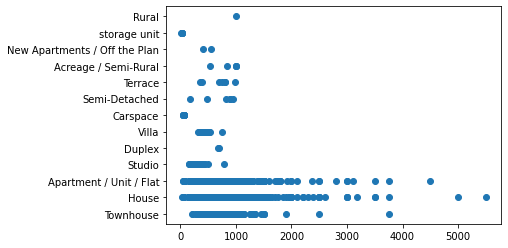

In [238]:
# graph the resulting data
plt.scatter(final_dataset['cost_text'],final_dataset['property_type'])

In [239]:
# compare the max and mins of each group
final_dataset.groupby('property_type')['cost_text'].max()

property_type
Acreage / Semi-Rural             1000.000000
Apartment / Unit / Flat          4500.000000
Carspace                           62.307692
Duplex                            700.000000
House                            5500.000000
New Apartments / Off the Plan     545.000000
Rural                            1000.000000
Semi-Detached                     950.000000
Studio                            786.000000
Terrace                           980.000000
Townhouse                        3750.000000
Villa                             750.000000
storage unit                       30.000000
Name: cost_text, dtype: float64

In [240]:
final_dataset.groupby('property_type')['cost_text'].min()

property_type
Acreage / Semi-Rural              540.0
Apartment / Unit / Flat            40.0
Carspace                           50.0
Duplex                            675.0
House                              33.0
New Apartments / Off the Plan     400.0
Rural                            1000.0
Semi-Detached                     175.0
Studio                            160.0
Terrace                           345.0
Townhouse                         215.0
Villa                             310.0
storage unit                       18.0
Name: cost_text, dtype: float64

In [241]:
final_dataset.sort_values(by = ['cost_text'], inplace = True)

In [242]:
# save final data set
final_dataset.to_csv(main_directory + 'data/curated/rental_properties_cleaned.csv')

In [243]:
# share houses, car spaces, storage units -> description, current way to find 'storage spaces' are probably not the best approach